# <font style="color:red;">Real Estate Price Predictor</font>

## Data Cleaning

Lets start off by importing few modules.

In [69]:
! jt -t monokai
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
pd.options.mode.chained_assignment = None # To Disable 'SettingWithCopyWarning'

'jt' is not recognized as an internal or external command,
operable program or batch file.


In [70]:
df1 = pd.read_csv(r"C:\Users\AJEETKUMAR UKANDE\AJ_PRACTICE FILE\Project\Common Projects\House_Price_Prediction\Pune_House_Data.csv")
df1.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [71]:
df1.shape

(13320, 9)

Group the dataframe by its area_type and find its count.

In [72]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Remove irrelevant columns from the dataset.

In [73]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,size,total_sqft,bath,price,site_location
0,2 BHK,1056,2.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,62.00,Anandnagar
3,3 BHK,1521,3.0,95.00,Aundh
4,2 BHK,1200,2.0,51.00,Aundh Road


Check for null values.

In [74]:
df2.isnull().sum()

size             16
total_sqft        0
bath             73
price             0
site_location     1
dtype: int64

In [140]:
df2[df2['price']>120]

,size,total_sqft,bath,price,site_location
6,4 BHK,2732,4.0,204.0,Baner
7,4 BHK,3300,4.0,600.0,Baner road
9,6 Bedroom,1020,6.0,370.0,Bhavani Peth
11,4 Bedroom,2785,5.0,295.0,Bopodi
14,3 Bedroom,2250,3.0,148.0,Camp
...,...,...,...,...,...
13308,3 BHK,1527,3.0,142.0,Nagar Road
13311,7 Bedroom,1500,9.0,250.0,Narayangaon
13315,5 Bedroom,3453,4.0,231.0,Pashan
13316,4 BHK,3600,5.0,400.0,Paud Road


Drop the rows with null values.

In [75]:
df3 = df2.dropna()
df3.isnull().sum()

size             0
total_sqft       0
bath             0
price            0
site_location    0
dtype: int64

In [76]:
df3.shape

(13246, 5)

The 'size' column seems to be quite inconsistent with its values. So, lets check that.

In [77]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Lets bring consistency to that column.

In [78]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) # Make new column called bhk and extract just the number into them.

In [79]:
df3.head()

,size,total_sqft,bath,price,site_location,bhk
0,2 BHK,1056,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,95.00,Aundh,3
4,2 BHK,1200,2.0,51.00,Aundh Road,2


We can now safely remove the size column.

In [80]:
df3 = df3.drop(['size'], axis='columns')
df3.head()

,total_sqft,bath,price,site_location,bhk
0,1056,2.0,39.07,Alandi Road,2
1,2600,5.0,120.00,Ambegaon Budruk,4
2,1440,2.0,62.00,Anandnagar,3
3,1521,3.0,95.00,Aundh,3
4,1200,2.0,51.00,Aundh Road,2


In [81]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [82]:
df3[df3['bhk']>20]

,total_sqft,bath,price,site_location,bhk
1718,8000,27.0,230.0,Uruli Devachi,27
4684,2400,40.0,660.0,Salunke Vihar,43


There seems to be a house with 43 bedrooms in just 2400 sqft. This needs to be resolved. This will be resolved in removing outliers section.

In [83]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

As of now, we need to fix the issue in sqft column which has entries as range.

In [84]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [85]:
df3[~df3['total_sqft'].apply(is_float)].head(10) # Get all those entries with range an an entry in 'total_sqft' column

,total_sqft,bath,price,site_location,bhk
30,2100 - 2850,4.0,186.000,Gultekdi,4
122,3067 - 8156,4.0,477.000,Ganeshkhind,4
137,1042 - 1105,2.0,54.005,Khadaki,2
165,1145 - 1340,2.0,43.490,Prabhat Road,2
188,1015 - 1540,2.0,56.800,Wakadewadi,2
410,34.46Sq. Meter,1.0,18.500,Ganeshkhind,1
549,1195 - 1440,2.0,63.770,Prabhat Road,2
648,4125Perch,9.0,265.000,Raviwar Peth,9
661,1120 - 1145,2.0,48.130,Tilak Road,2
672,3090 - 5002,4.0,445.000,Alandi Road,4


Now we notice that the problem is not just ranges, but also there seems to be alphabets. Since, these entries are very small in number they can be ignored.

Lets write a function to convert those ranges into one value, by taking their average.

In [86]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [87]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num) # Apply the fuction
df4.head()

,total_sqft,bath,price,site_location,bhk
0,1056.0,2.0,39.07,Alandi Road,2
1,2600.0,5.0,120.00,Ambegaon Budruk,4
2,1440.0,2.0,62.00,Anandnagar,3
3,1521.0,3.0,95.00,Aundh,3
4,1200.0,2.0,51.00,Aundh Road,2


In [88]:
df4.loc[30]

total_sqft         2475.0
bath                  4.0
price               186.0
site_location    Gultekdi
bhk                     4
Name: 30, dtype: object

## Feature Engineering

In [89]:
df5 = df4.copy()

Lets add a new column called price per sqft. This will help in later stages especially during the outliers detection.

In [90]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,1521.0,3.0,95.00,Aundh,3,6245.890861
4,1200.0,2.0,51.00,Aundh Road,2,4250.000000


Clean the location column

In [91]:
df5.site_location = df5.site_location.apply(lambda x: x.strip())
site_location_stats = df5.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
site_location_stats

site_location
Alandi Road        139
Karve Nagar        139
Paud Road          139
Ganeshkhind        139
Parvati Darshan    139
                  ... 
Shukrawar Peth     136
Satara Road        136
Model colony       136
Vadgaon Budruk     134
other                1
Name: site_location, Length: 97, dtype: int64

Locations with less than 10 data points can be included in a general category.

In [92]:
len(site_location_stats[site_location_stats<=10])

1

In [93]:
site_location_stats_less_than_10 =site_location_stats[site_location_stats<=10]
site_location_stats_less_than_10

site_location
other    1
Name: site_location, dtype: int64

In [94]:
len(df5.site_location.unique())

97

In [95]:
df5.site_location = df5.site_location.apply(lambda x: 'other' if x in site_location_stats_less_than_10 else x)
len(df5.site_location.unique())

97

In [96]:
df5.head()

,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,1521.0,3.0,95.00,Aundh,3,6245.890861
4,1200.0,2.0,51.00,Aundh Road,2,4250.000000


## Handling Outliers

There are some entries in the dataframe like I havd mentioned before that just seem right with the square feet itoccupies and 
the number of bedrooms they have. We need to remove such entries.

In [97]:
df5.shape

(13246, 6)

In [98]:
df6 = df5[~(df5['total_sqft']/df5['bhk']<300)] # Remove entries whose sqft/bhk is less than 300
df6.head()

,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,1521.0,3.0,95.00,Aundh,3,6245.890861
4,1200.0,2.0,51.00,Aundh Road,2,4250.000000


In [99]:
df6.shape

(12502, 6)

In [100]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.628922
std        4168.075333
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

There appears to be a huge difference between the min and max values for price_per_sqft column. That needs to be fixed.

In [101]:
def remove_pps_outliers(df): # Function to remove outliers for every location
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft) # Calculate mean
        st = np.std(subdf.price_per_sqft) # Calculate SD
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [102]:
df7 = remove_pps_outliers(df6)
df7.shape

(10883, 6)

The next issue is that there are entries where for the same location the 2 BHK houses cost more than 3BHK houses.

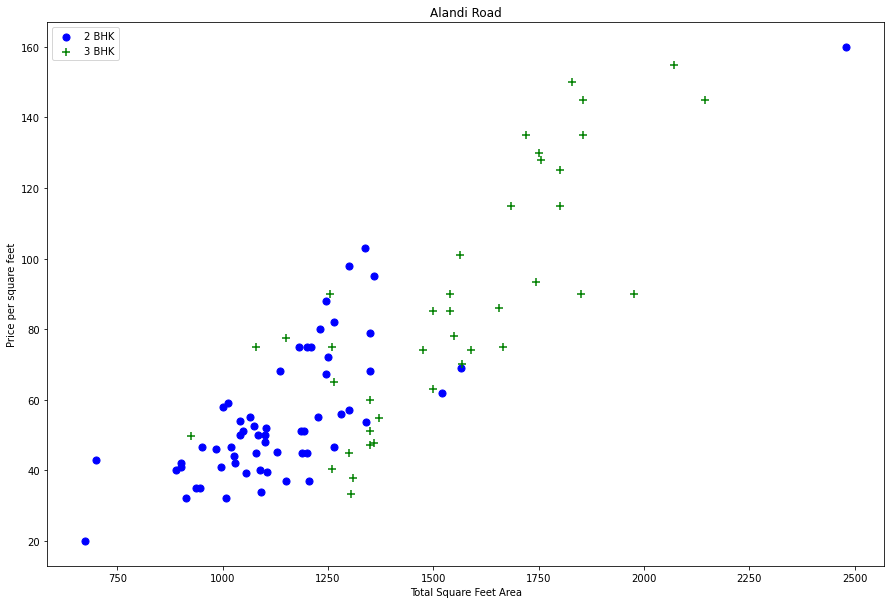

In [103]:
def plot_scatter_chart(df, site_location):
    bhk2 = df[(df.site_location==site_location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==site_location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price per square feet')
    plt.title(site_location)
    plt.legend()
    
plot_scatter_chart(df7, "Alandi Road") # An Example of the issue (Around 1500 sq.ft area)

To tackle this we will build a dictionary of stats per BHK then remove those 2BHK aprtments whose price_per_sqft is less than
the mean price_per_sqft of 1BHK apartment.

In [104]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for site_location, site_location_df in df.groupby('site_location'):
        bhk_stats = {}
        for bhk, bhk_df in site_location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in site_location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7543, 6)

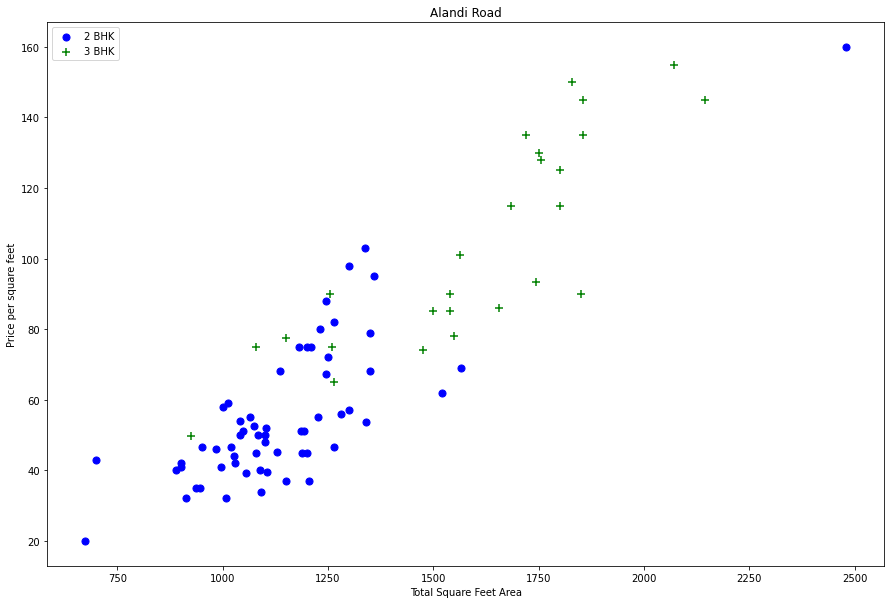

In [105]:
plot_scatter_chart(df8, "Alandi Road")

Now, you can notice that the issue around 1500 sq.ft is resolved. Also, the scatter plot has been almost clearly divided into two clear divisions.

Lets plot a histogram.

Text(0, 0.5, 'Count')

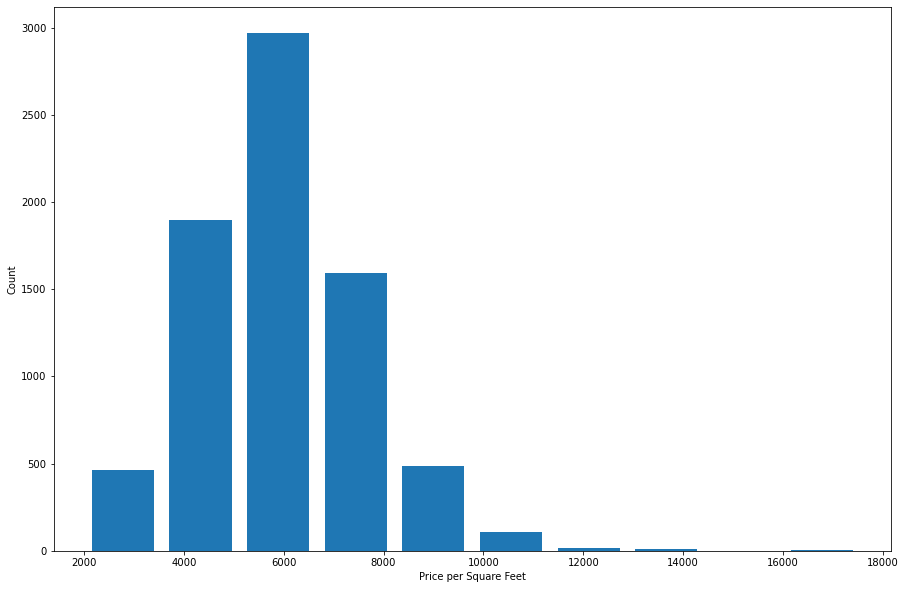

In [106]:
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

We can observe that around 5000-10000 we have majority of out data points and our data follows a normal distribution with a bell
shaped curve.

Next outlier is the bathroom. Typically, houses with 2BHK have 2 or 2 bathrooms. It is unusual to have more number of bathrooms.

Text(0, 0.5, 'Count')

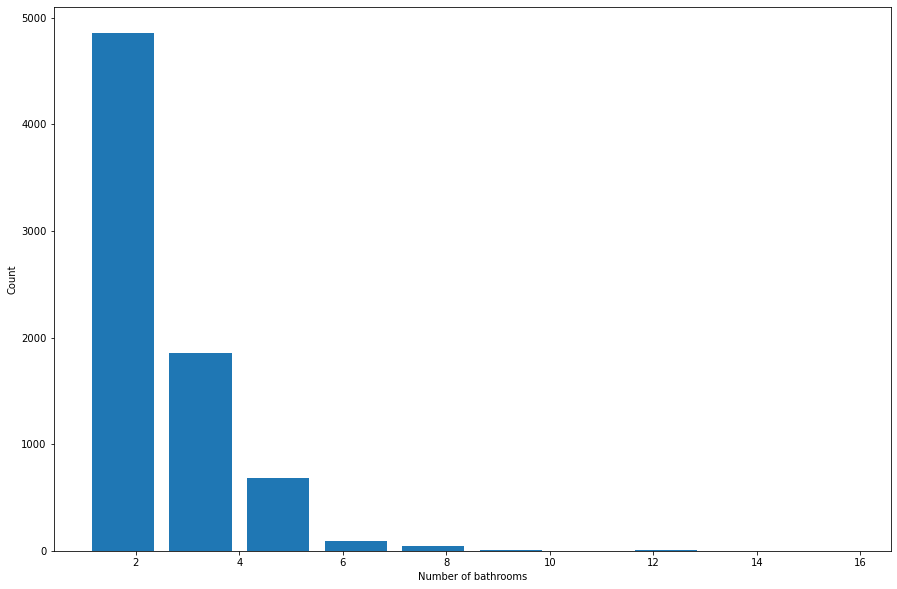

In [107]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

Lets remove the entries where the number of bathrooms is greater than number of bedrooms+2.

In [108]:
df8[df8.bath > df8.bhk+2]

,total_sqft,bath,price,site_location,bhk,price_per_sqft
772,1806.0,6.0,116.0,Baner,3,6423.034330
3067,11338.0,9.0,1000.0,Ghorpade Peth,6,8819.897689
4231,7000.0,8.0,450.0,Karve Nagar,4,6428.571429


In [109]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7479, 6)

We can now drop the price_per_sqft column as it won't be necessary to build out machine learning model.

In [110]:
df10 = df9.drop(['price_per_sqft'], axis='columns')
df10.head()

,total_sqft,bath,price,site_location,bhk
0,1056.0,2.0,39.07,Alandi Road,2
1,2894.0,4.0,245.00,Alandi Road,4
2,1084.0,2.0,50.00,Alandi Road,2
3,1230.0,2.0,80.00,Alandi Road,2
4,1750.0,3.0,130.00,Alandi Road,3


In [111]:
df10.shape

(7479, 5)

## Building Machine Learning Model

We will use K-fold Cross-Validation and GridSearchCV to come up with the best algorithm and parameters(Hyper paramter Tuning). Machine Learning models take only numerical inputs. Therefore, we will be using One Hot Encoding mechanism (dummies) to establish this.

In [112]:
dummies = pd.get_dummies(df10.site_location)
dummies.head()

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
df11 = pd.concat([df10, dummies], axis='columns') # Append df10 and dummies dataframe
df11.head()

,total_sqft,bath,price,site_location,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,Alandi Road,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,80.00,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,130.00,Alandi Road,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can  now remove the location column as it is already encoded.

In [115]:
df12 = df11.drop('site_location', axis='columns')
df12.head()

,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,80.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,130.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
df12.shape

(7479, 100)

The dependent variable here is the price as we are going to be predicting the price of any apartment  gevn certain features. So, lets remove it so as to train the model.

In [117]:
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
y = df12.price
y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

x and y are finally ready, now onto dividing the data into training and testing part.

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [120]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression() # Linear Regression Model
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8234170057059694

In [121]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # ShuffleSplit will randomize the sample
cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.87729294, 0.87158074, 0.82821585, 0.89763339, 0.8106378 ])

All the scores are above 80%, which is a very good sign.

GridSearchCV runs the model on different regressors and parameters and gives the best score.

In [53]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor

# # Function that decides between the three most popular algorithms which are iterated through to find out which one gives the 
# # best score
# def find_best_model_using_gridsearch(X, y):
#     algos = {
#         'linear_regression': {
#             'model': LinearRegression(),
#             'params': {
#                 'normalize': [True, False]
#             }
#         },
#         'lasso': {
#             'model': Lasso(),
#             'params': {
#                 'alpha': [1, 2],
#                 'selection': ['random', 'cyclic']
#             }
#         },
#         'decision_tree': {
#             'model': DecisionTreeRegressor(),
#             'params': {
#                 'criterion': ['mse', 'friedman_mse'],
#                 'splitter': ['best', 'random']
#             }
#         }
#     }
    
#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X, y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })
        
#     return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

# find_best_model_using_gridsearch(X, y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687438,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.717874,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


It is clear that Linear Regression model is the best model with parameter normalize set to False.

Onto the final element to predict the price.

In [122]:
def predict_price(site_location, sqft, bath, bhk):
    loc_index = np.where(X.columns==site_location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [125]:
df1['site_location'].value_counts()

Alandi Road            139
Kalyani Nagar          139
Mahatma Gandhi Road    139
Lulla Nagar            139
Laxmi Road             139
                      ... 
Sadashiv Peth          138
Raviwar Peth           138
Rasta Peth             138
Ghorpadi               138
other                    1
Name: site_location, Length: 97, dtype: int64

Lets perform our first few predictions.

In [126]:
predict_price('Alandi Road', 1000, 2, 2)

52.13746738433838

In [127]:
predict_price('Laxmi Road', 1000, 3, 3)

64.26393222808838

In [128]:
predict_price('Baner', 1000, 3, 3)

54.1350212097168

In [129]:
predict_price('Mahatma Gandhi Road', 1000, 3, 3)

50.166138648986816

In [130]:
predict_price('Sadashiv Peth', 1000, 2, 2)

56.134079933166504

In [134]:
predict_price('Karve Nagar', 1000, 3, 3)

54.252333641052246

In [137]:
predict_price('Aundh', 1000, 3, 3)

68.3990888595581

In [141]:
predict_price('Prabhat Road', 1000, 4, 4)

65.63598155975342

We need to export our model as pickle file to be used by the flask server.

In [60]:
import pickle
with open('Bengaluru_House_Data.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

Lets export the columns also as json file to use the locations on frontend.

In [61]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))